<h1 style="text-align: center;">Coronavirus Data Visualization</h1>


<style>
table {border-collapse: collapse; width: 50%; color: black;}

th, td {text-align: left; padding: 8px;}

tr:nth-child(even){background-color: #ededed}
tr:nth-child(odd){background-color: #ffffff}

th {background-color: #4CAF50; color: white;}
</style>

<table>
  <tr>
    <th>Firstname</th>
    <th>Lastname</th>
    <th>Age</th>
  </tr>
  <tr>
    <td>Jill</td>
    <td>Smith</td>
    <td>50</td>
  </tr>
  <tr>
    <td>Eve</td>
    <td>Jackson</td>
    <td>94</td>
  </tr>
  <tr>
    <td>Jill</td>
    <td>Smith</td>
    <td>50</td>
  </tr>
  <tr>
    <td>Eve</td>
    <td>Jackson</td>
    <td>94</td>
  </tr>
</table>


## Data Retrieval

In [ ]:
import requests
FILEPATH = "./data/"
URLs = ["https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv", "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv", "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"]
FILENAMES = ["confirmed.csv", "deaths.csv", "recovered.csv"]

for index in range(3):
    tmp_content = requests.get(URLs[index])
    tmp_file = open(FILEPATH + FILENAMES[index], 'wt')
    tmp_text = tmp_content.text.replace('\n', '')
    tmp_file.write(tmp_text)
    tmp_file.close()

map created
Finitooooooooooooooooooooooooooooo


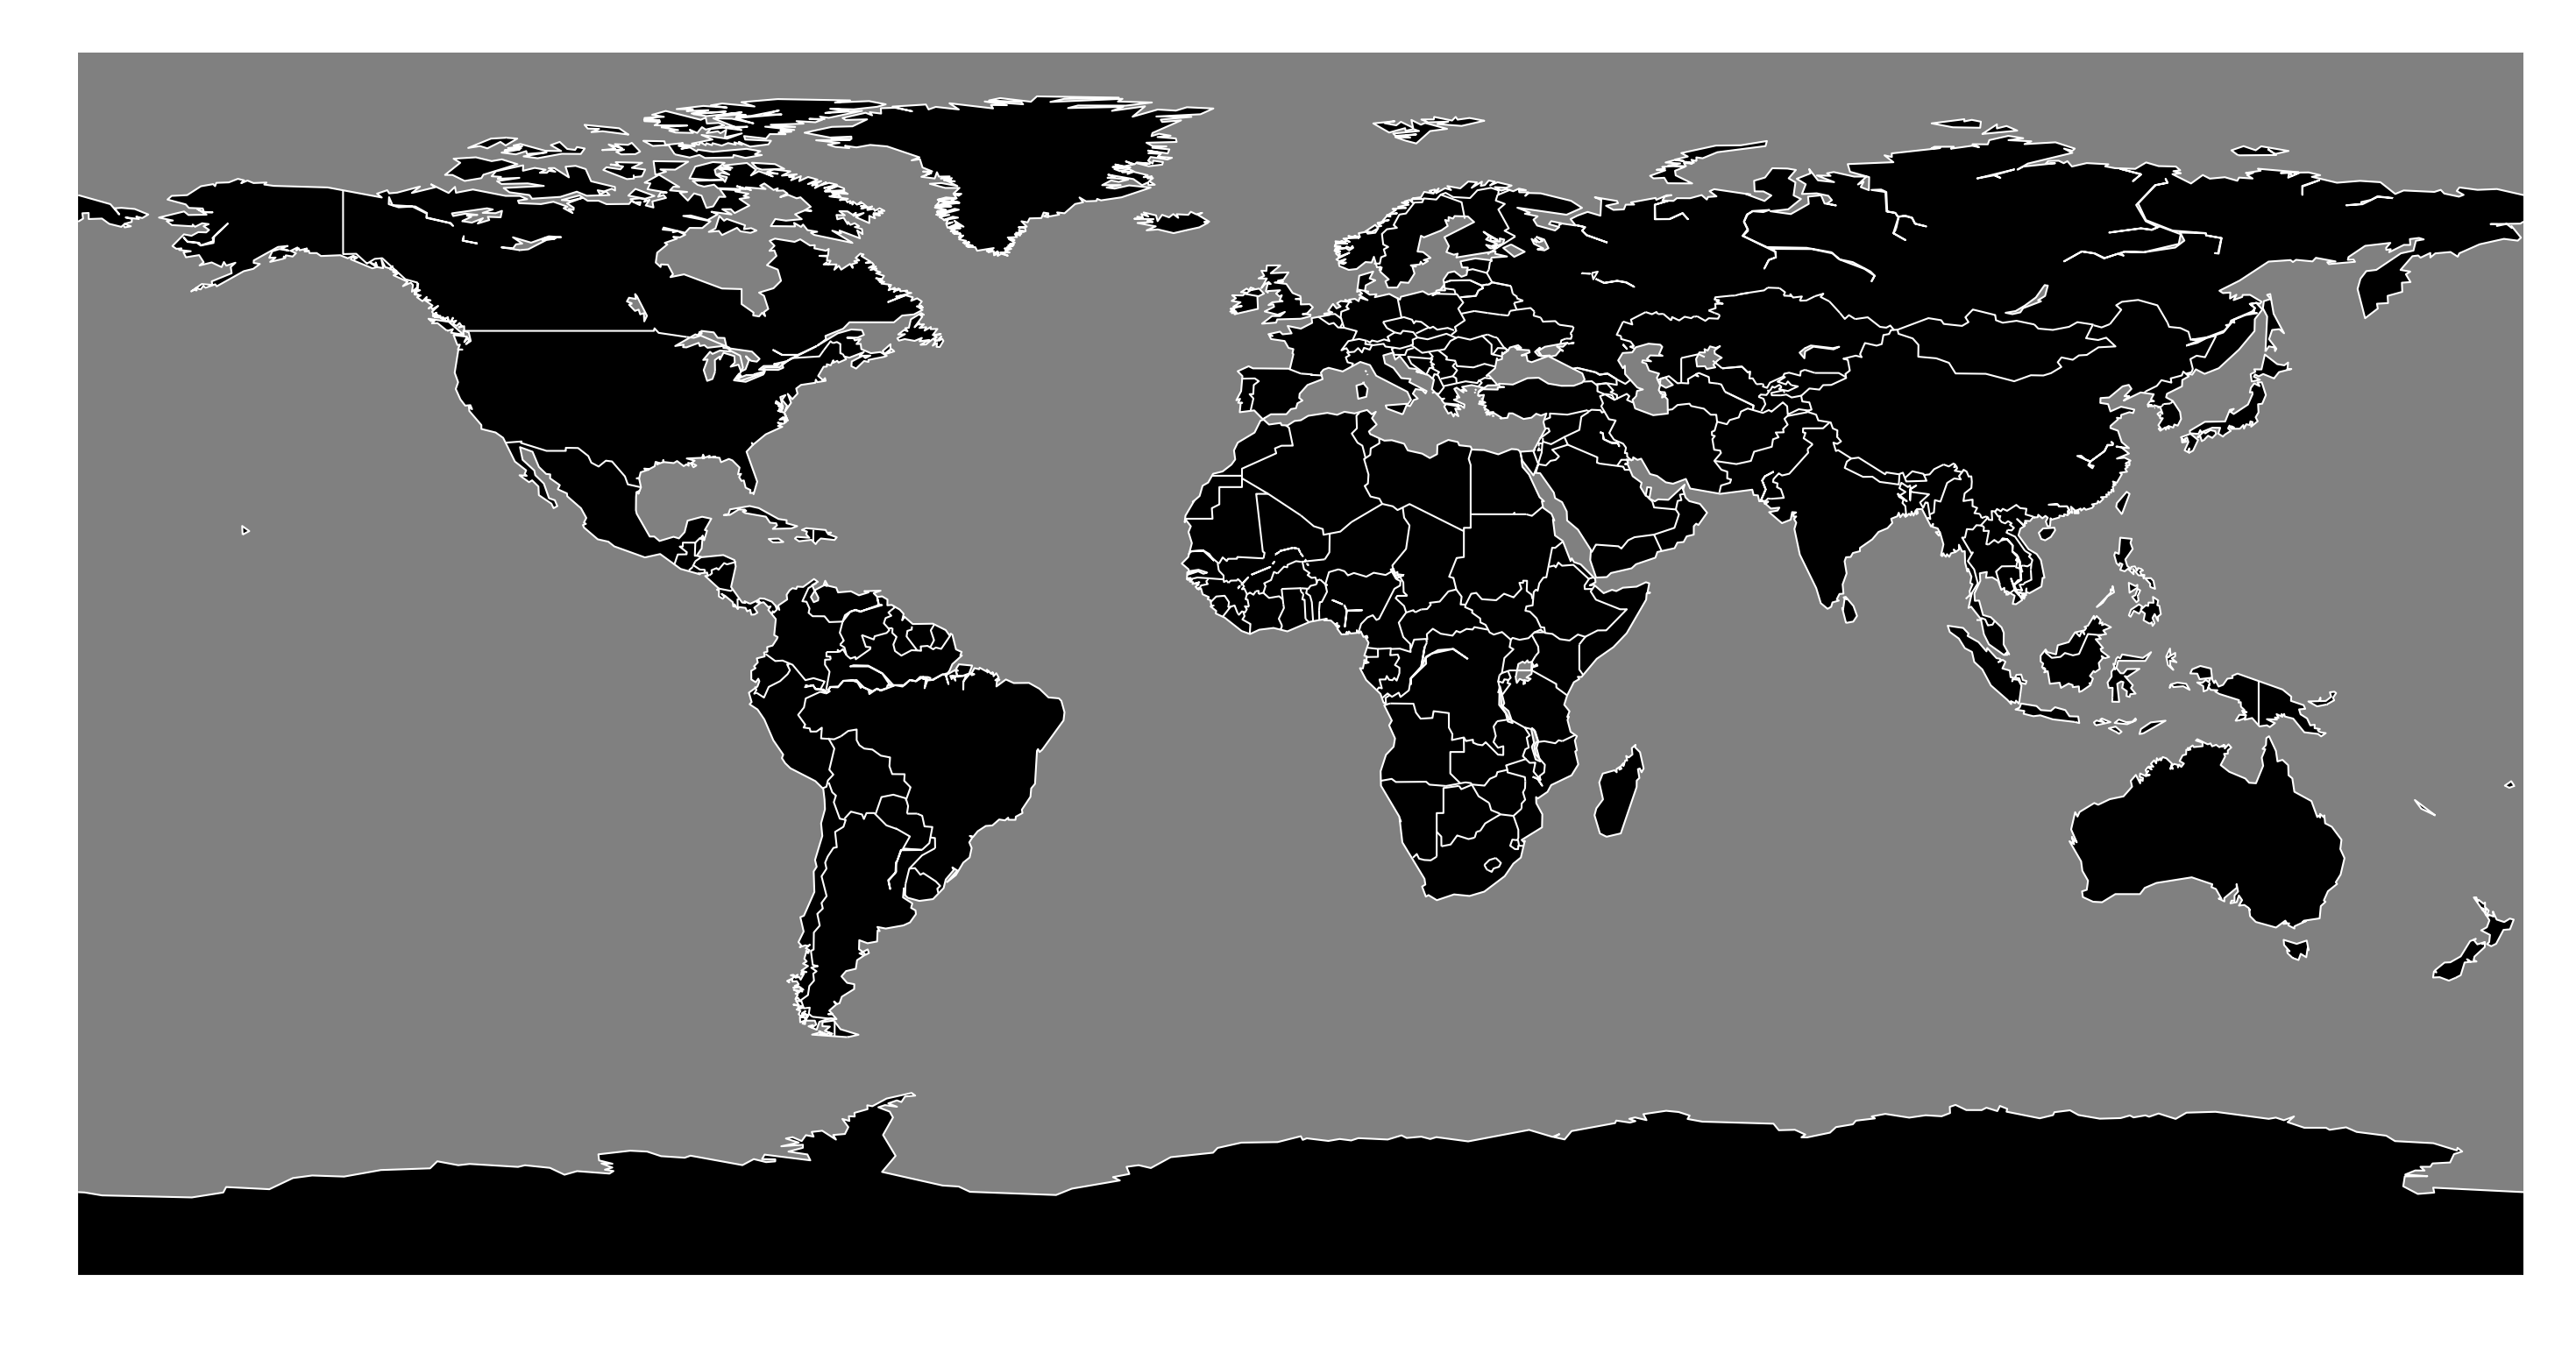

In [98]:
import pandas
import math
import numpy as np
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plot

DATAPATH = "./data/"
FILENAMES = ["confirmed.csv", "deaths.csv", "recovered.csv"]

FRAMESPATH = "./frames/"

FPS = 30
SECONDS_PER_DAY = 2
FRAMES_PER_DAY = FPS * SECONDS_PER_DAY


fig = plot.figure(dpi=600)

world_map = Basemap(projection='cyl',lat_0=0,lon_0=0,resolution='c')
world_map.fillcontinents(color='black',lake_color='grey')
world_map.drawcountries(linewidth=0.25, color="white")
world_map.drawcoastlines(linewidth=0.25, color="white")
world_map.drawmapboundary(fill_color='grey', linewidth=0)

print("map created")


# read the data
data = pandas.read_csv(DATAPATH + FILENAMES[0], sep=",")

keys = [key for key in data]


tmp_matrix = np.array(data[keys[4:]].values)

max_val = tmp_matrix.max()

sizes = fig.get_size_inches()*fig.dpi
new_max = sizes[1] * 0.25

tmp_matrix = tmp_matrix / max_val
tmp_matrix = tmp_matrix * new_max

#data[keys[4:]] = tmp_matrix


frame_number = 0
for index in range(5,len(keys)):
    daily_variation = data[keys[index]] - data[keys[index - 1]]
    radius_increment = daily_variation / FRAMES_PER_DAY
    
    today = data[keys[index - 1]]
    for frame in range(FRAMES_PER_DAY):
        scatter = world_map.scatter(data['Long'], data['Lat'], s=np.sqrt(today*80), alpha=0.4, c='red', zorder=4)
        today += radius_increment
        text = plot.text( -170, -58, keys[index - 1] , ha='left', va='bottom', size=12, color='white')
        plot.savefig(FRAMESPATH + str(frame_number) + '.png', bbox_inches='tight')
        frame_number += 1
        scatter.remove()
        text.remove()

print("Finitooooooooooooooooooooooooooooo")


In [104]:
import cv2
import glob
import os

FRAMESPATH = "./frames/"

video_name = 'video.avi'

images = glob.glob(FRAMESPATH + "*.png")
images.sort(key=os.path.getmtime)

frame = cv2.imread(images[0])
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'H264')
video = cv2.VideoWriter(video_name, fourcc, 30, (width,height))

for image in images:
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()